In [19]:
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import skimage as skm
from skimage import exposure, img_as_float
from matplotlib import cm
from skimage import io
from skimage import exposure

In [8]:
# Create path to the image file 
image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\GIS\\torellneset_clipped_825.tif"

In [10]:
with rasterio.open(image_path) as dataset:
    # Read Bands from the clipped image
    blue  = dataset.read(1)
    green = dataset.read(2)
    red   = dataset.read(3)
    NIR   = dataset.read(4)
    

In [15]:
B1 = np.array(blue).astype(float)
B2 = np.array(green).astype(float)
B3 = np.array(red).astype(float)
B4 = np.array(NIR).astype(float)

In [14]:
NB1 = (B1-np.min(B1))/(np.max(B1)-np.min(B1))
NB2 = (B2-np.min(B2))/(np.max(B2)-np.min(B2))
NB3 = (B3-np.min(B3))/(np.max(B3)-np.min(B3))
NB4 = (B4-np.min(B4))/(np.max(B4)-np.min(B4))

NDVI - Normalized Difference Vegetation Index

In [16]:
NDVI = (NB4-NB3)/(NB4+NB3)

C:\Users\Student\AppData\Local\Temp\ipykernel_3312\717407457.py:1: RuntimeWarning: invalid value encountered in divide
  NDVI = (NB4-NB3)/(NB4+NB3)


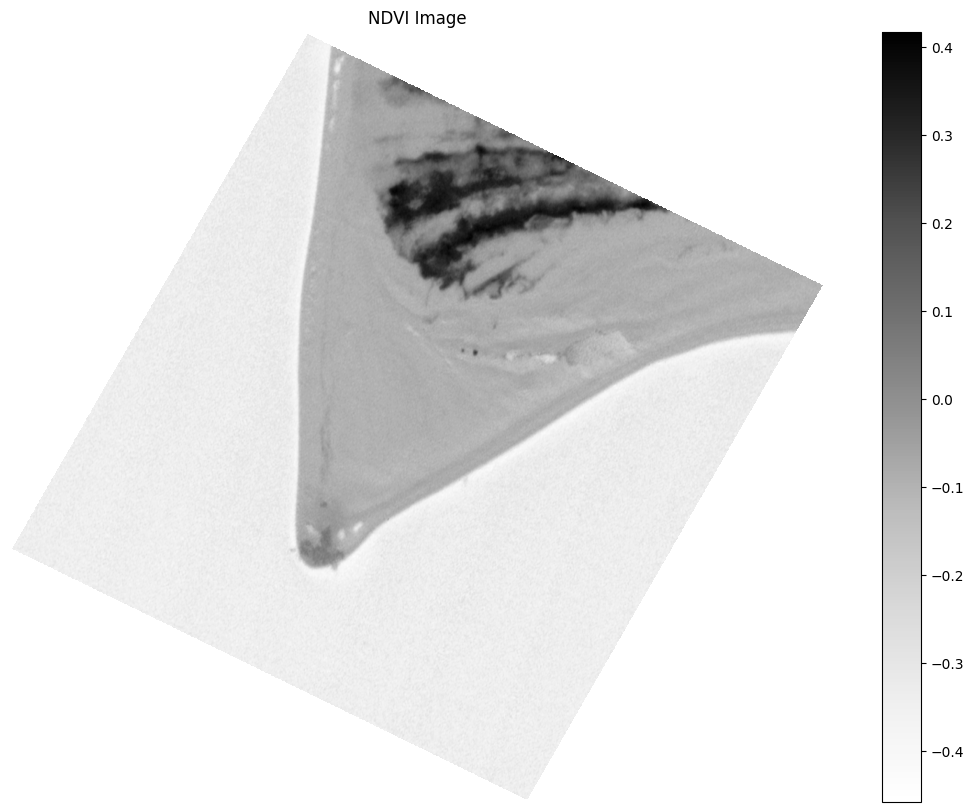

In [20]:
plt.figure(figsize=(15,10))
plt.imshow(NDVI, cmap=cm.Greys)
plt.title('NDVI Image')
plt.colorbar()
plt.axis('off')
plt.show()

In [21]:
lai = 0.55

In [22]:
veg = NDVI > lai
non_veg = NDVI <= lai

In [23]:
rgb = np.stack([NB3, NB2, NB1], axis=2)

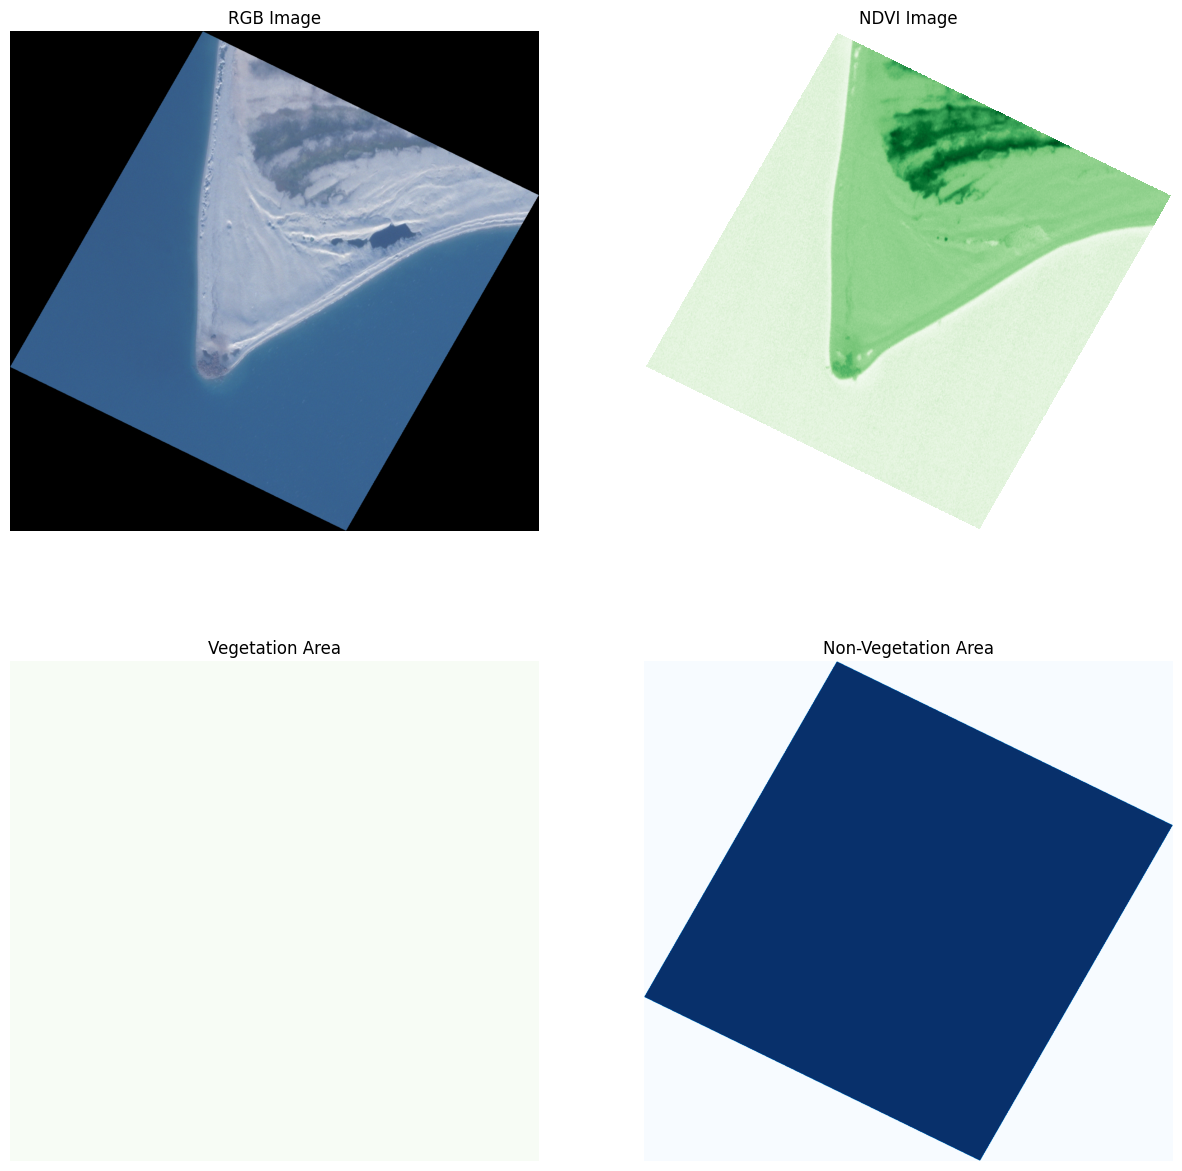

In [24]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax[0,0].imshow(rgb)
ax[0,0].set_title('RGB Image')
ax[0,0].axis('off')
######
ax[0,1].imshow(NDVI, cmap=cm.Greens)
ax[0,1].set_title('NDVI Image')
ax[0,1].axis('off')
######
ax[1,0].imshow(veg, cmap=cm.Greens)
ax[1,0].set_title('Vegetation Area')
ax[1,0].axis('off')
######
ax[1,1].imshow(non_veg, cmap=cm.Blues)
ax[1,1].set_title('Non-Vegetation Area')
ax[1,1].axis('off')
plt.show()

SAVI is used to correct Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas where vegetative cover is low.

In [28]:
SAVI = ((NB4-NB3)/(NB4+NB3+0.5))*(1+0.5)

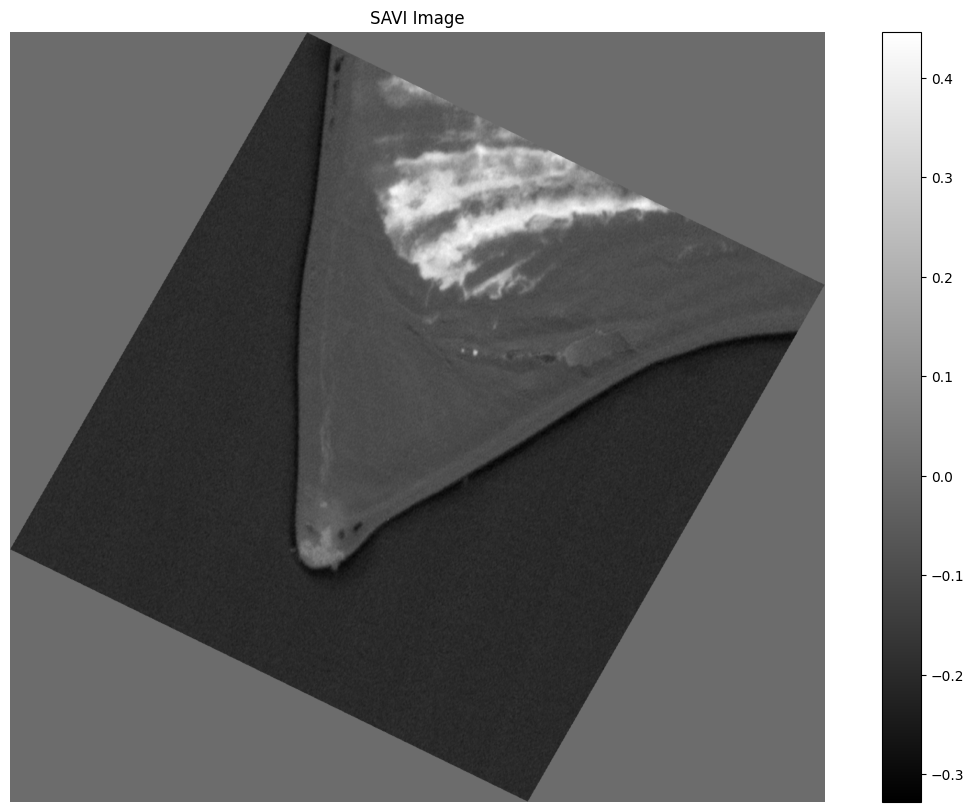

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(SAVI, cmap=cm.gray)
plt.title('SAVI Image')
plt.colorbar()
plt.axis('off')
plt.show()

The Normalized Difference Water Index 

In [25]:
NDWI = (NB2 - NB4)/(NB2 + NB4)

C:\Users\Student\AppData\Local\Temp\ipykernel_3312\4209689226.py:1: RuntimeWarning: invalid value encountered in divide
  NDWI = (NB2 - NB4)/(NB2 + NB4)


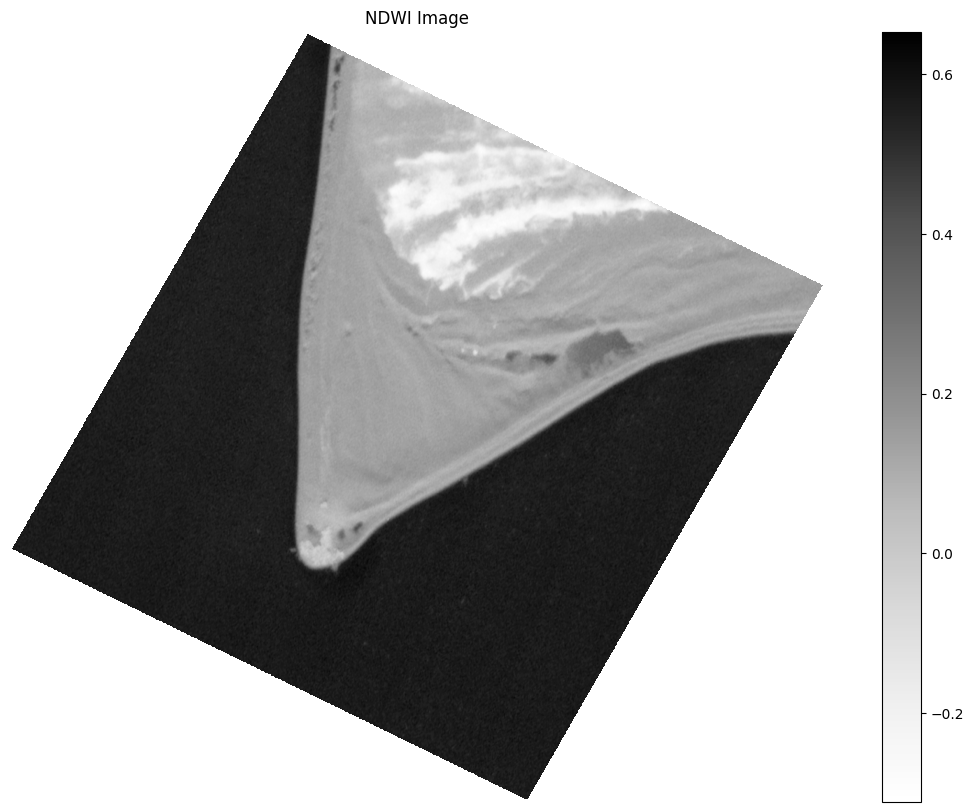

In [26]:
plt.figure(figsize=(15,10))
plt.imshow(NDWI, cmap=cm.Greys)
plt.title('NDWI Image')
plt.colorbar()
plt.axis('off')
plt.show()

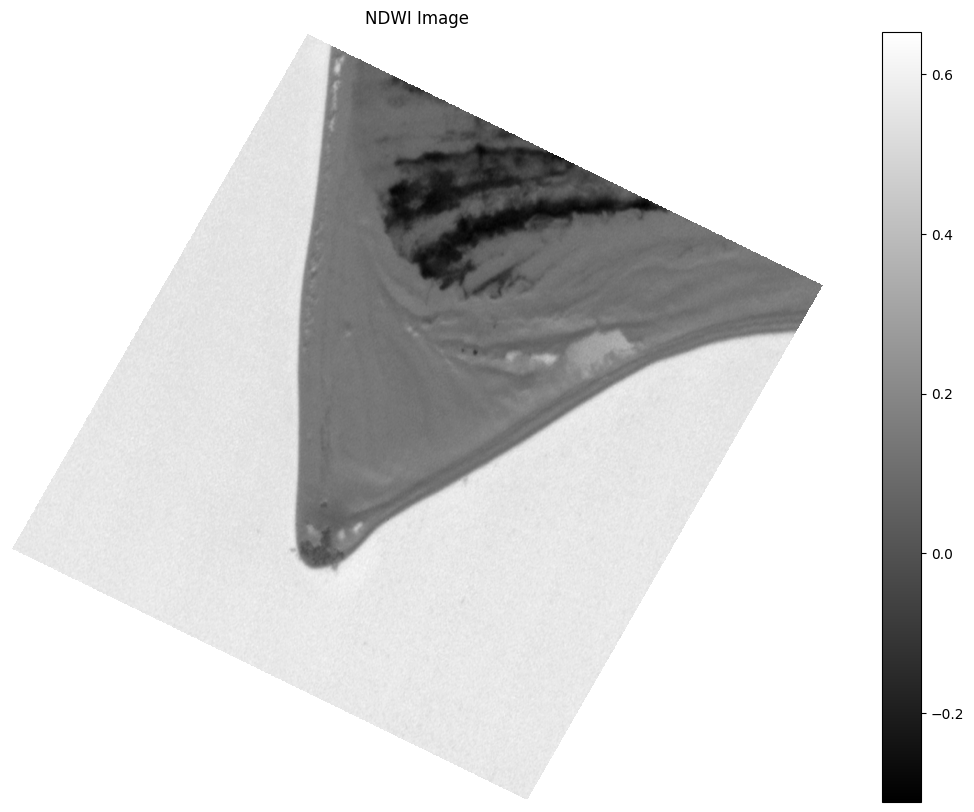

In [27]:
plt.figure(figsize=(15,10))
plt.imshow(NDWI, cmap=cm.gray)
plt.title('NDWI Image')
plt.colorbar()
plt.axis('off')
plt.show()

Bare soil index (BI)

In [30]:
BI = ((NB4 - NB2)-NB3)/((NB4 + NB2)+NB3)

C:\Users\Student\AppData\Local\Temp\ipykernel_3312\1082863471.py:1: RuntimeWarning: invalid value encountered in divide
  BI = ((NB4 - NB2)-NB3)/((NB4 + NB2)+NB3)


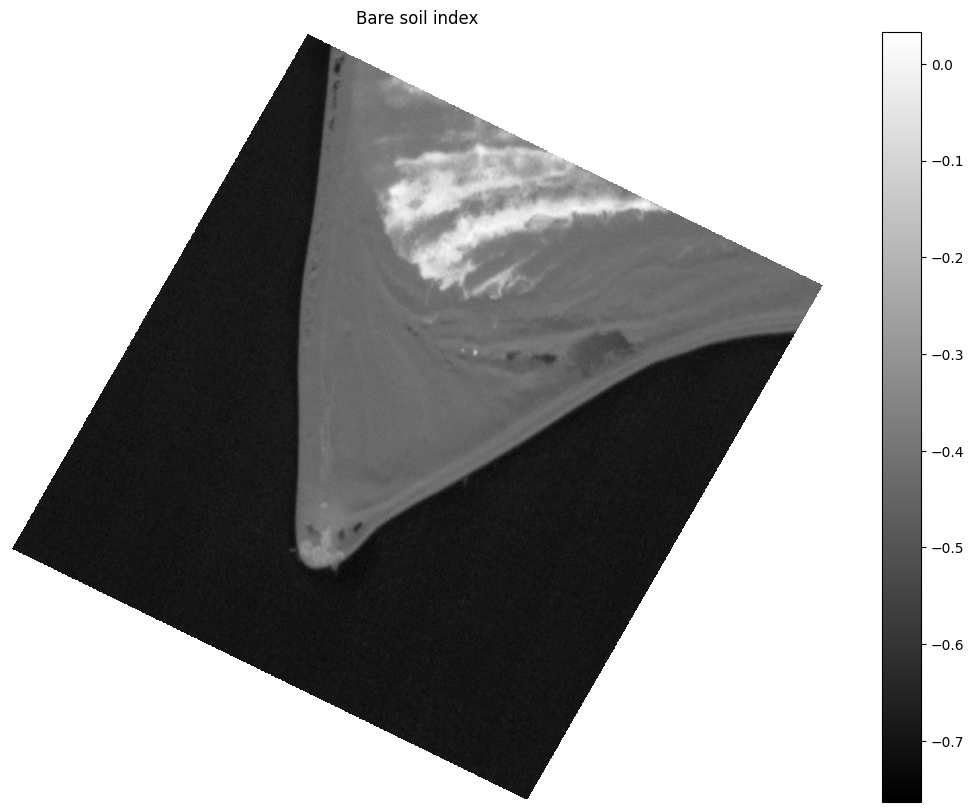

In [31]:
plt.figure(figsize=(15,10))
plt.imshow(BI, cmap=cm.gray)
plt.title('Bare soil index')
plt.colorbar()
plt.axis('off')
plt.show()

In [32]:
lai = 0.68

In [33]:
veg = NDVI > lai
non_veg = NDVI <= lai

In [34]:
water = 0.2

In [35]:
watero = NDWI > water
non_watero = NDWI <= water

In [36]:
soilveg = 0.44

In [37]:
soil = SAVI > soilveg
non_soil = SAVI <= soilveg

In [38]:
GEnNB1 = exposure.adjust_gamma(NB1 , gamma=0.5, gain=1)
GEnNB2 = exposure.adjust_gamma(NB2 , gamma=0.5, gain=1)
GEnNB3 = exposure.adjust_gamma(NB3 , gamma=0.5, gain=1)
GNstack = np.stack([GEnNB3,GEnNB2,GEnNB1], axis=2)

In [39]:
rgb = np.stack([NB3,NB2,NB1], axis=2)

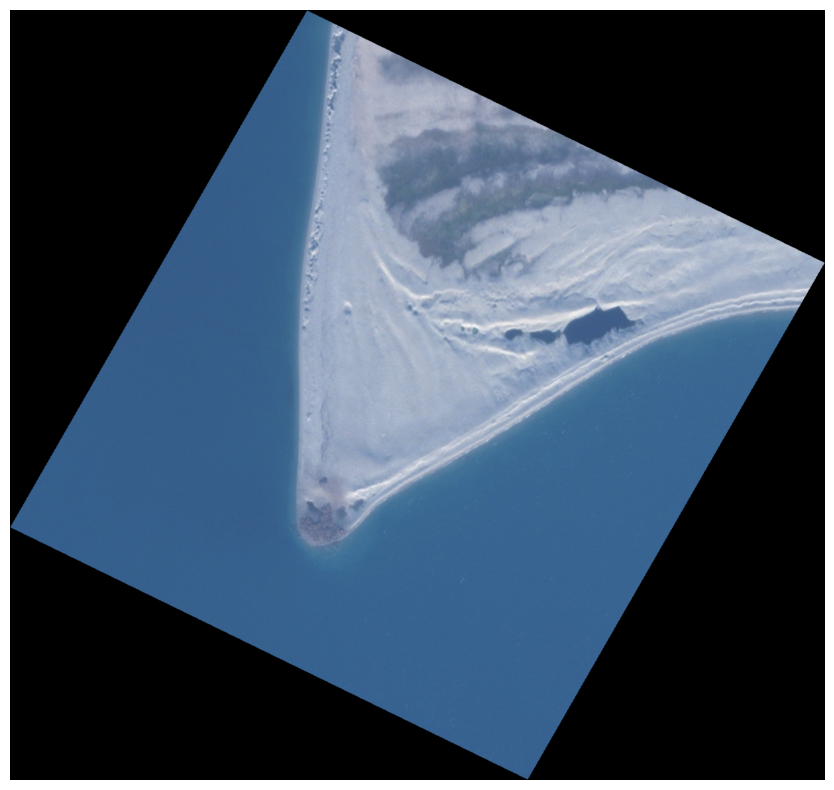

In [40]:
plt.figure(figsize=(15,10))
plt.imshow(rgb)
plt.axis('off')
plt.show()

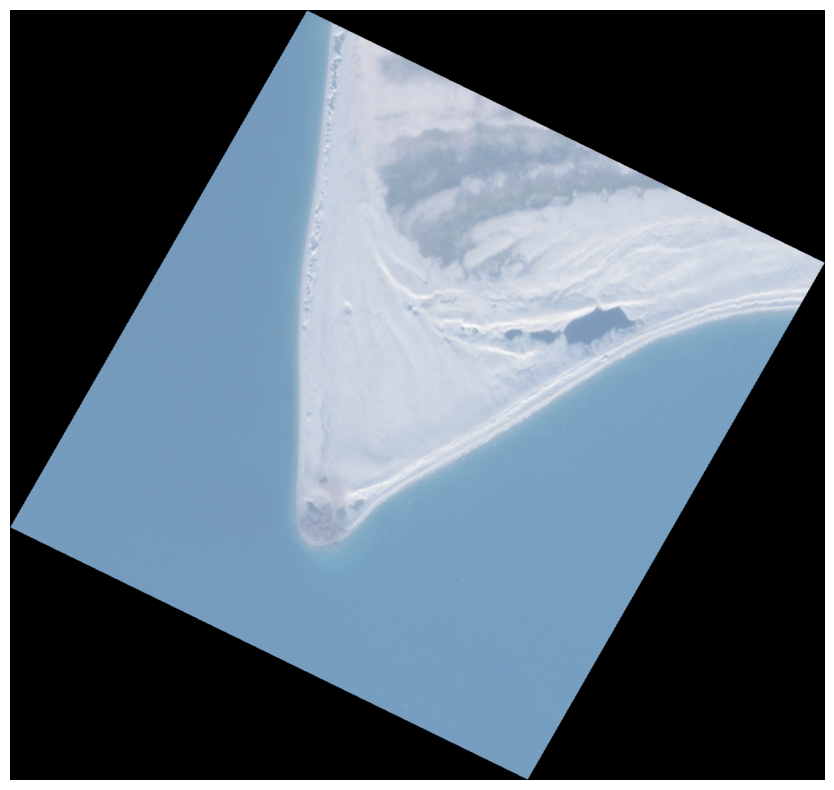

In [41]:
plt.figure(figsize=(15,10))
plt.imshow(GNstack)
plt.axis('off')
plt.show()

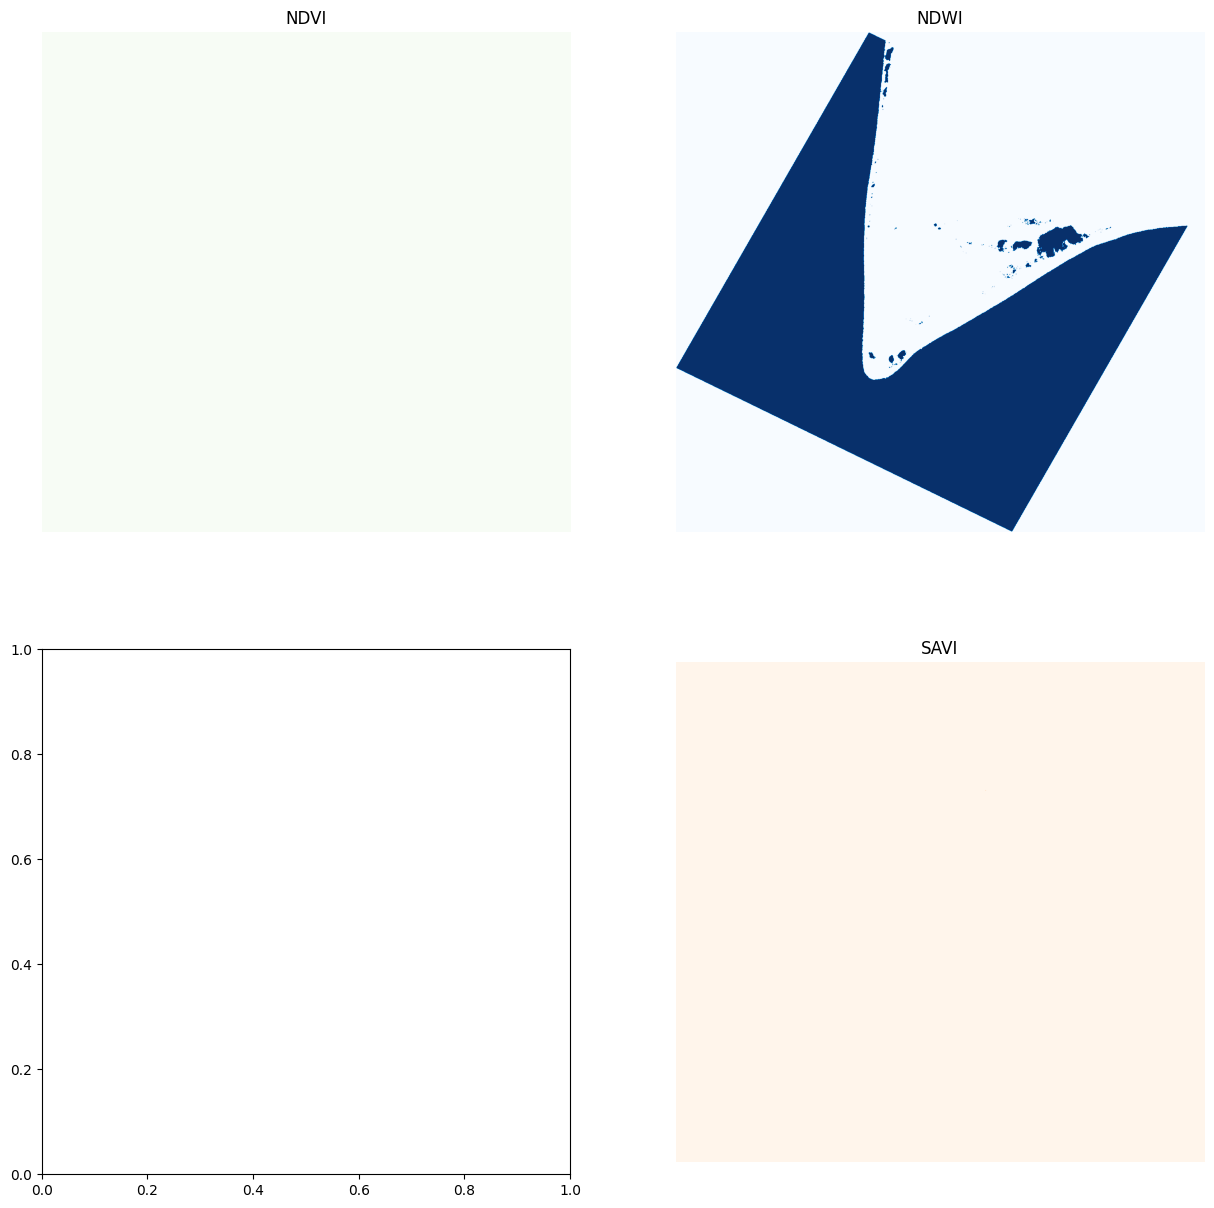

In [42]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax[0,0].imshow(veg, cmap=cm.Greens)
ax[0,0].set_title('NDVI')
ax[0,0].axis('off')
######
ax[0,1].imshow(watero, cmap=cm.Blues)
ax[0,1].set_title('NDWI')
ax[0,1].axis('off')
######
ax[1,1].imshow(soil, cmap=cm.Oranges)
ax[1,1].set_title('SAVI')
ax[1,1].axis('off')
plt.show()